In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from face_recognition import *
from sklearn.cluster import *

from UBFaceDetector import *

In [2]:
face_images = 'validation_folder/images/'
face_cluster = 'faceCluster_5'

In [3]:
def read_imgs(path, typ=1):
    imgs = []
    for folder, _, files in os.walk(path):
        for file in files:
            if '.jpg' in file:
                imgs.append(cv2.imread(f'{folder}/{file}', typ))
    return np.array(imgs, dtype=object)

def dnn_faces(img, typ=None):
    h, w = img.shape[:2]
    model_path = './yunet.onnx'
    boxes = []
    faces = []

    if typ == 'yunet_quantized':
        model_path = './yunet_quantized.onnx'

    detector = cv2.FaceDetectorYN.create(
        model_path,
        "",
        (300, 300),
    )
    detector.setInputSize((w, h))
    _, imgs = detector.detect(img)
    if imgs is not None:
        imgs = imgs.astype(np.int32).tolist()
        for face in imgs:
            x1, y1, w, h = face[:4]
            x1, y1 = max(x1, 0), max(y1, 0)
            faces.append(img[y1:y1 + h + 1, x1:x1 + w + 1])
            boxes.append([x1, y1, w, h])

    return faces, boxes

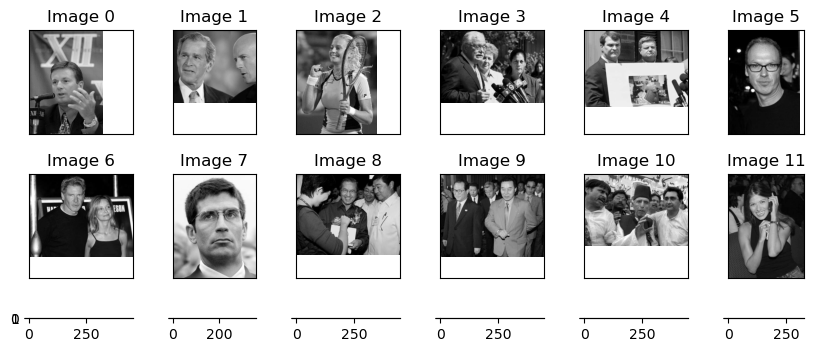

In [4]:
all_faces = read_imgs(face_images, 0)
n = 12
rand_idx = np.random.randint(0, len(all_faces), n)
imgs = all_faces[rand_idx]
show_batch(imgs, col=6, show_title=True)

In [5]:
# k = 4
# faces, boxes = get_faces(imgs[k])
# show_batch(faces, 5)

In [6]:
# show(draw_boxes(imgs[k], boxes))

In [7]:
k = 6
imgs_c = read_imgs(face_images)
faces, boxes = dnn_faces(imgs_c[k])

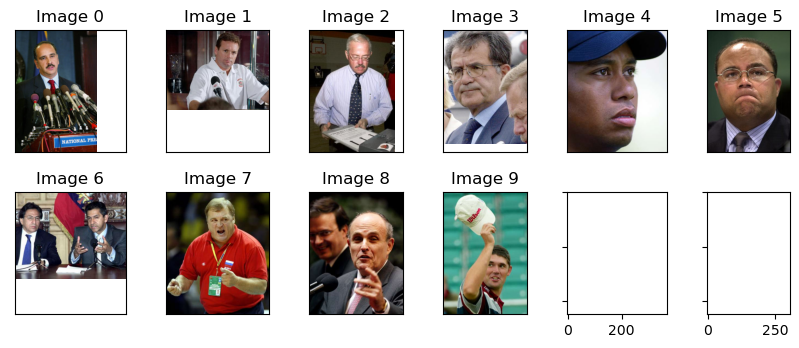

In [8]:
show_batch(imgs_c[:10], col=6, show_title=True)

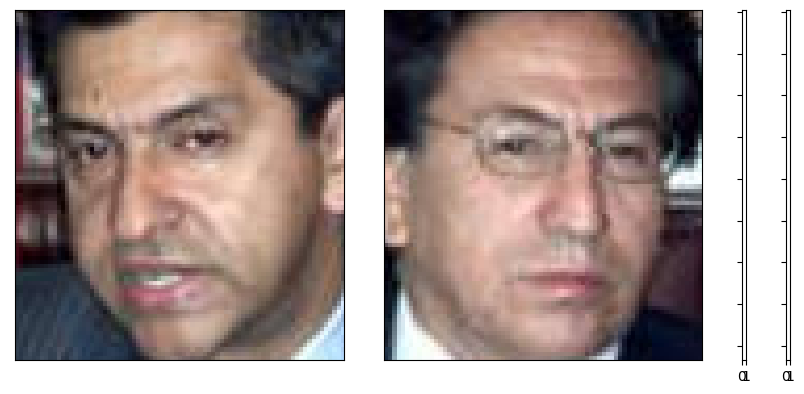

In [9]:
show_batch(faces)

### Clustering

In [10]:
model, res, clusters = cluster_helper(face_cluster, 5)

Using KMeans


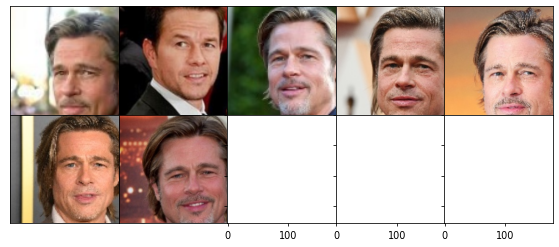

In [11]:
show_batch(clusters[0], axes_pad=0, col=5, show_title=False, dpi=70)

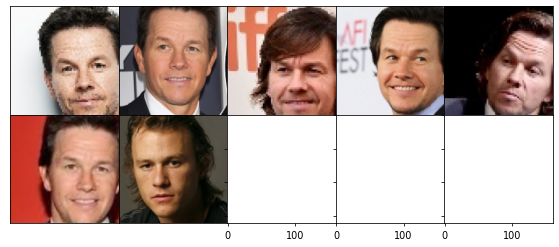

In [12]:
show_batch(clusters[1], axes_pad=0, col=5, show_title=False, dpi=70)

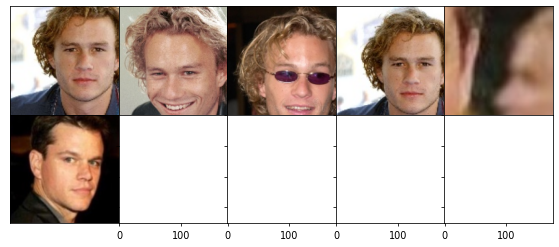

In [13]:
show_batch(clusters[2], axes_pad=0, col=5, show_title=False, dpi=70)

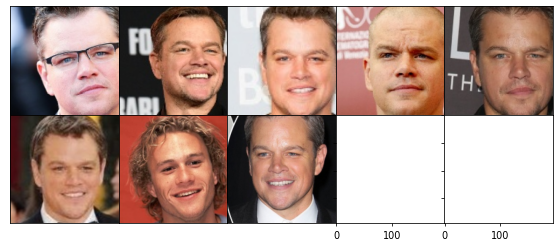

In [14]:
show_batch(clusters[3], axes_pad=0, col=5, show_title=False, dpi=70)

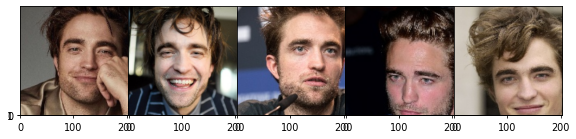

In [15]:
show_batch(clusters[4], axes_pad=0, col=5, show_title=False, dpi=70)

In [16]:
show_batch(clusters[5], axes_pad=0, col=5, show_title=False, dpi=70)

KeyError: 5